<a href="https://colab.research.google.com/github/sejii93/Probability-Model/blob/main/ProbModel_Ch1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Average take-offs per minutes =  1.5498  std =  0.31367498465768673
Unif. rnd num =  [[0.69695923 0.38065711 0.25757871 0.5997617  0.41583762]
 [0.11908167 0.17009783 0.44162659 0.61311744 0.32019938]]
# TO/10min of rwy 1 =  [3. 2. 2. 2. 2.]
# TO/10min of rwy 2 =  [2. 2. 2. 2. 2.]
Avg. #TO =  1.549462  std =  0.9924683927239195
original nTO2 =  [2. 2. 2. ... 3. 2. 0.]
10 elements samples =  [[2. 2. 2. ... 3. 0. 0.]
 [0. 0. 0. ... 2. 2. 2.]
 [0. 2. 2. ... 2. 2. 2.]
 ...
 [0. 2. 0. ... 2. 2. 2.]
 [2. 2. 2. ... 2. 2. 2.]
 [2. 0. 0. ... 3. 2. 0.]]
Avg. of sampling =  1.5494620000000001  std =  0.31356548049171484


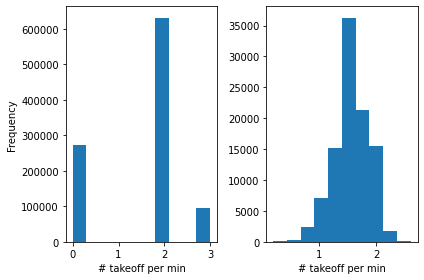

In [ ]:
# Binomial RV example: Take-off clearance
import numpy as np
from numpy.random import default_rng
import matplotlib.pyplot as plt
import seaborn as sns

c0 = 0
c1 = 2
c2 = 3

p1 = 0.6318 # prob of take-off clearance of c1
p2 = 0.0954 # prob of take-off clearance of c2
p0 = 1-p1-p2  # prob of take-off clearance of c0

mu = c0*p0 + c1*p1 + c2*p2
sig = np.sqrt((c0**2*p0+c1**2*p1+c2**2*p2-mu**2)/10)
print("Average take-offs per minutes = ", mu, " std = ", sig)

rng = default_rng()
rndNum = rng.uniform(0, 1, (2, 5))
nTO = np.zeros(np.shape(rndNum))
nTO[rndNum<p1] = c1
nTO[(rndNum>=p1) & (rndNum<p1+p2)] = c2
print("Unif. rnd num = ", rndNum)
print("# TO/10min of rwy 1 = ", nTO[0, :])
print("# TO/10min of rwy 2 = ", nTO[1, :])

rndNum2 = rng.random(1000000)
nTO2 = np.zeros(rndNum2.shape)
nTO2[rndNum2<p1] = c1
nTO2[(rndNum2>=p1) & (rndNum2<p1+p2)] = c2
print("Avg. #TO = ", np.mean(nTO2), " std = ", np.std(nTO2))

print("original nTO2 = ", nTO2)
nTO2sampling = nTO2.reshape(-1, 10)
print("10 elements samples = ", nTO2sampling)
nTO2avg = np.mean(nTO2sampling, axis=1)
print("Avg. of sampling = ", np.mean(nTO2avg), " std = ", np.std(nTO2avg))


fig, axs = plt.subplots(1, 2)
axs[0].hist(nTO2)
axs[0].set_xlabel('# takeoff per min')
axs[0].set_ylabel('Frequency')

axs[1].hist(nTO2avg)
axs[1].set_xlabel('# takeoff per min')

plt.tight_layout()

sns.set_style("darkgrid")

[0 0 2 1 0 0 0 0 0 1]
[ 2.   2.5  3.   9.  11. ]
[0.5 0.5 6.  2.  0.5]
0.1999999999989086 1.2616228070186353 0.7926299322085965


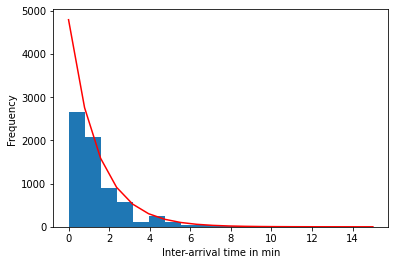

In [ ]:
# Poisson RV example: Check-in counter
import numpy as np
from scipy.stats import expon
import math
import matplotlib.pyplot as plt

lam = 0.7 # Arrival rate: pax per minutes

rng = np.random.default_rng()

tWindow = 10000 # in minutes
numPAX = rng.poisson(lam, tWindow)  # Number of PAX per minute
totalPAX = numPAX.sum()
tArrApprox = np.ndarray(totalPAX) # Approximated arrival time of each PAX

nPAX = 0
for t in range(tWindow):
  if numPAX[t] > 0:
    tArrApprox[nPAX:nPAX+numPAX[t]] = np.linspace(t, t+1, numPAX[t], endpoint=False)
    nPAX += numPAX[t]

tInter = np.diff(tArrApprox)  # Inter-arrival time

print(numPAX[0:10])
print(tArrApprox[0:5])
print(tInter[0:5])

tBins = np.linspace(0, math.ceil(max(tInter)), 20)  # every minute
plt.hist(tInter, bins=tBins)
plt.plot(tBins, expon.pdf(tBins, scale=1/lam)*tInter.size, 'r')
plt.xlabel('Inter-arrival time in min')
plt.ylabel('Frequency')

loc, scale = expon.fit(tInter)
print(loc, scale, 1/scale)

   Number of PAX per min  Simulated from Exp RV  Theoretical
0                    0.0                    648   673.369672
1                    1.0                    477   471.358770
2                    2.0                    183   164.975570
3                    3.0                     38    38.494300
4                    4.0                      8     6.736502
5                    5.0                      1     0.943110
6                    6.0                      1     0.110030


Text(0, 0.5, 'Frequency')

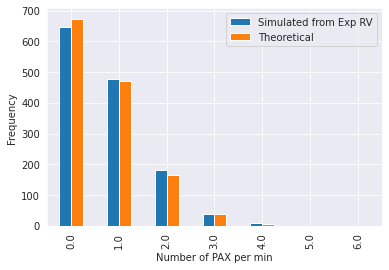

In [ ]:
# Exponential RV example: Check-in counter
import numpy as np
from scipy.stats import poisson
import math
import pandas as pd

lam = 0.7 # Arrival rate: pax per minutes
scale = 1/lam

rng = np.random.default_rng()

totalPAX = 1000
tInter = rng.exponential(scale, totalPAX) # Inter-arrival time
tArr = tInter.cumsum()  # Arrival time of each PAX
# print(tInter)
# print(tArr)

tWindow = math.ceil(tArr[-1]) # Time window of total PAX
numPAX = np.zeros(tWindow)  # Number of PAX per minute
for t in range(tWindow):
  numPAX[t] = np.count_nonzero((tArr>=t) & (tArr<(t+1)))
# print(numPAX)

uniPAX, nPAX = np.unique(numPAX, return_counts=True)
df = pd.DataFrame({"Number of PAX per min": uniPAX, "Simulated from Exp RV": nPAX, "Theoretical": tWindow*poisson.pmf(uniPAX, lam)})
print(df)
ax = df.plot.bar(x="Number of PAX per min", y=["Simulated from Exp RV", "Theoretical"])
ax.set_ylabel('Frequency')

5.807817637734447 2.0880046697680177 0.5745018849285641


Text(0, 0.5, 'Frequency')

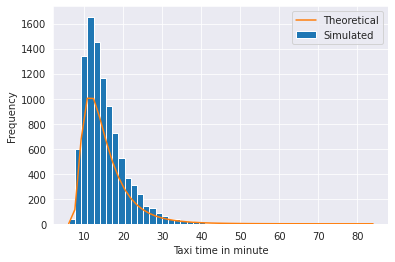

In [ ]:
## Log-N example: Taxi time
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm
import math

c = 6 # Shift location
mu = 2.0531 # Mu parameter of Log-N
sig = 0.5901  # Sigma parameter of Log-N

rng = np.random.default_rng()

numAC = 10000 # Number of aircraft
tTaxi = rng.lognormal(mu, sig, numAC)+c
s, loc, scale = lognorm.fit(tTaxi)
print(loc, np.log(scale), s)

Bins = np.linspace(math.floor(min(tTaxi)), math.ceil(max(tTaxi)))
plt.hist(tTaxi, Bins, label="Simulated")
plt.plot(Bins, numAC*lognorm.pdf(Bins, s=sig, scale=np.exp(mu), loc=c), label="Theoretical")
plt.legend()
plt.xlabel("Taxi time in minute")
plt.ylabel("Frequency")